# Imports

In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score as f1s
import math
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
sns.set() # setting seaborn default for plots

## Extract data

### Variable Dictionary 

                               
**survived**: Survived the crash                                                       
**pclass**:   Ticket Class                 *1* = 1st, *2* = 2nd, *3* = 3nd                     
**sex**:      Sex                                                  
**age**:      Age in years                                                          
**sibsp**:    # of siblings/spouses aboard                                                                                     
**parch**:    # of parents/children aboard                                                                                     
**fare**:     Passenger fare                                                                                     
**ticket**:   Ticket number                                                              
**cabin**:    Cabin number                                                               
**alive**:    Alive today                  
**alone**:    Was alone

In [7]:
titanic=pd.DataFrame(sns.load_dataset('titanic'))
titanic.drop(['class','who', 'deck','embark_town','alive','embarked'],axis=1,inplace=True)

# Casting and formatting

titanic['sex']=titanic['sex'].apply(lambda x: 1 if (x=='female') else 0)
titanic['age'] = titanic['age'].fillna(value=round(titanic['age'].mean()))
titanic = titanic.astype(float)

# Normalizing

def normalize(arr):
    arr = np.array(arr)
    M = arr.max()
    m = arr.min()
    arr_ = np.zeros(len(arr))
    for i in range(len(arr_)):
        arr_[i] = float(arr[i]-m)/float(M-m)
    return arr_

titanic['age'] = normalize(titanic['age'])
titanic['fare'] = normalize(titanic['fare'])
titanic

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone
0,0.0,3.0,0.0,0.271174,1.0,0.0,0.014151,1.0,0.0
1,1.0,1.0,1.0,0.472229,1.0,0.0,0.139136,0.0,0.0
2,1.0,3.0,1.0,0.321438,0.0,0.0,0.015469,0.0,1.0
3,1.0,1.0,1.0,0.434531,1.0,0.0,0.103644,0.0,0.0
4,0.0,3.0,0.0,0.434531,0.0,0.0,0.015713,1.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,0.0,0.334004,0.0,0.0,0.025374,1.0,1.0
887,1.0,1.0,1.0,0.233476,0.0,0.0,0.058556,0.0,1.0
888,0.0,3.0,1.0,0.371701,1.0,2.0,0.045771,0.0,0.0
889,1.0,1.0,0.0,0.321438,0.0,0.0,0.058556,1.0,1.0


## Analysing data

### Statistics

C:\Users\lucas\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


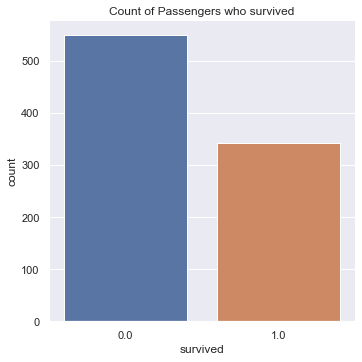

In [107]:
sns.factorplot('survived', data=titanic, kind='count')
plt.title('Count of Passengers who survived');

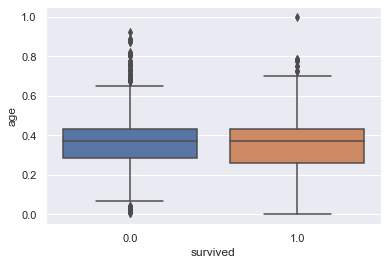

In [108]:
sns.boxplot(x='survived',y='age',data=titanic)

### Distribution os survivers

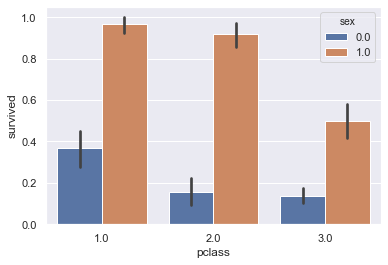

In [109]:
sns.barplot(x='pclass',y='survived',hue='sex',data=titanic);

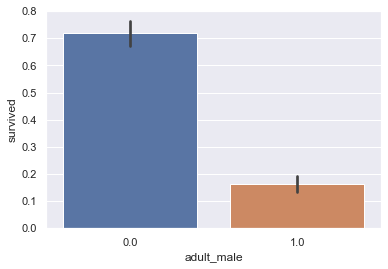

In [110]:
sns.barplot(x='adult_male',y='survived',data=titanic);

## Correlation

survived      1.000000
pclass       -0.338481
sex           0.543351
age          -0.070657
sibsp        -0.035322
parch         0.081629
fare          0.257307
adult_male   -0.557080
alone        -0.203367
Name: survived, dtype: float64

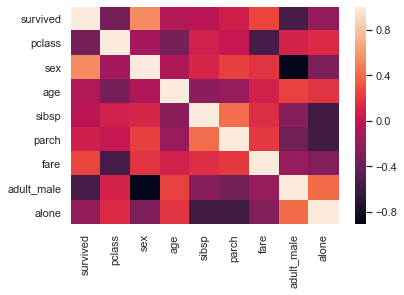

In [40]:
sns.heatmap(titanic.corr());
titanic.corr()['survived']

# Machine learning

In [58]:
class logistic_regression:
    
    def __init__(self,N,p,tol,treshold,verbose=False):
        self.N = N  #number of iterations (Hyperparameter)
        self.p = p #alpha(Hyperparameter) 
        self.tol = tol
        self.treshold = treshold
        self.precision = abs(math.floor(math.log(self.treshold, 10)))
        self.verbose = verbose
        
    def sigmoid(self,a):
        return(1/(1+np.exp(-a)))    #sigmoid (Link Fucntion)
    
    def a(self,x,w):
        a = w[0]
        a += np.dot(w[1:],x)
        
        return a
        
    def cost(self,y,y_pred):
        n = len(y)
        cost = float(-1/n)*(np.dot(y,np.log(y_pred))+np.dot((1-y),np.log(1-y_pred)))
        return round(cost,self.precision)
                       
    def fit(self,x,y): #(X-data for training, y - Output)
        x = np.array(x).astype(float)
        y = np.array(y).astype(float)
        n=x.shape[0] #number of samples of x and y
        m=x.shape[1] #number of parameters (columns) of x
        self.w=np.ones(m+1)/10  #Initializing the weights vector
        count = 0
        dw = np.ones(m+1)
        cost = 1
        while count < self.N and cost > self.tol:
            y_pred = np.zeros(n)
            for i in range(n):
                x_row = x[i]
                a = self.a(x_row,self.w)
                y_pred[i] = self.sigmoid(a)
                dw[1:] = (y_pred[i]-y[i])*x_row
                dw[0] = y_pred[i]-y[i]
                self.w = self.w - self.p*dw
                
            cost = self.cost(y,y_pred)
            if self.verbose:
                print(f'cost={cost}')
            count += 1
            
    def predict(self,x):
        x = np.array(x)
        aux = self.w[0]*np.ones(len(x))
        a_pred = np.dot(x,self.w[1:])
        a_pred+=aux
        y_pred = self.sigmoid(a_pred)
        
        def convert(x):
            if x >= self.treshold:
                return 1.
            else:
                return .0
            
        y_pred_class = list(map(convert,y_pred))
        
        return a_pred,y_pred,y_pred_class
    
    def stats(self,y,y_pred,verbose=False):
        tp = tn = fp = fn = 0.
        y = np.array(y).astype(int)
        y_pred = np.array(y_pred).astype(int)
        
        for i in range(len(y)):
            if y[i] == 1. and y_pred[i] == 1.:
                tp+=1
            elif y[i] == 0. and y_pred[i] == 0.:
                tn+=1
            elif y[i] == 1. and y_pred[i] == 0.:
                fn+=1
            else:
                fp+=1
        
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        f1 = 2*(precision*recall)/(precision+recall)
        if verbose:
            print(f'precision = {precision} recall = {recall} f1 = {f1}')
            
        return precision,recall,f1


## Split data in multiple batches of `train` and `test`. Y(target parameter) is `survived`
## This is called cross-fold validation

In [60]:
n_splits = 10
test_size = 0.3

sss = StratifiedShuffleSplit(n_splits=n_splits, 
                             test_size=test_size, 
                             random_state=42)

X = titanic.drop(['survived'],axis=1)
y = titanic['survived']

lr = logistic_regression(50,.1,1e-7,.5)
precisions = []
recalls = []
f1s = []

for train_index, test_index in sss.split(X, y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]

    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

    lr.fit(X_train,y_train)
    a_pred,y_pred,y_pred_class = lr.predict(X_test)
    precision,recall,f1 = lr.stats(y_test,y_pred_class,True)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    

precision = sum(precisions)/len(precisions)
recall = sum(recalls)/len(recalls)
f1 = sum(f1s)/len(f1s)

print(f'avg precision = {precision} avg recall = {recall} avg f1 = {f1}')

precision = 0.9285714285714286 recall = 0.5048543689320388 f1 = 0.6540880503144654
precision = 0.696078431372549 recall = 0.6893203883495146 f1 = 0.6926829268292684
precision = 0.7745098039215687 recall = 0.7669902912621359 f1 = 0.7707317073170732
precision = 0.8382352941176471 recall = 0.5533980582524272 f1 = 0.6666666666666667
precision = 0.7752808988764045 recall = 0.6699029126213593 f1 = 0.7187500000000001
precision = 0.8536585365853658 recall = 0.6796116504854369 f1 = 0.7567567567567567
precision = 0.7692307692307693 recall = 0.6796116504854369 f1 = 0.7216494845360826
precision = 0.9464285714285714 recall = 0.5145631067961165 f1 = 0.6666666666666666
precision = 0.7802197802197802 recall = 0.6893203883495146 f1 = 0.7319587628865979
precision = 0.7777777777777778 recall = 0.6116504854368932 f1 = 0.6847826086956521
avg precision = 0.8139991292101862 avg recall = 0.6359223300970875 avg f1 = 0.7064733630669231


### Plotting

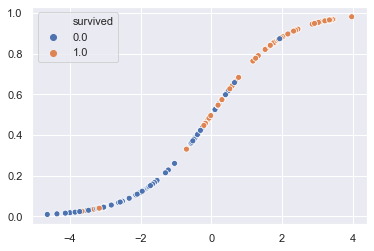

In [62]:
a_test = np.ones(len(X_test))*lr.w[0]+np.dot(X_test,lr.w[1:])
sns.scatterplot(x=a_test,y=lr.sigmoid(a_test),hue=y_test);

#The treshold of 0.5 is not efficient

## Tuning of hyperparamter `p`(learning rate), `test_size` and `treshold`

### Testing

In [81]:
step = 0.01

ps_interval = [0.05,0.11]
test_sizes_interval = [0.30,0.36]
tresholds_interval = [0.40,0.46]

ps = np.arange(ps_interval[0],ps_interval[1],step)
test_sizes = np.arange(test_sizes_interval[0],test_sizes_interval[1],step)
tresholds = np.arange(tresholds_interval[0],tresholds_interval[1],step)

n_splits = 10

data=[]#stores (p,test_size,tresholdf,f1_score of that setup)
count = 1

for p in ps:
    for test_size in test_sizes:
        for treshold in tresholds:

            sss = StratifiedShuffleSplit(n_splits=n_splits, 
                                         test_size=test_size, 
                                         random_state=42)

            X = titanic.drop(['survived'],axis=1)
            y = titanic['survived']

            lr = logistic_regression(50,p,1e-7,treshold)
            f1_scores = []

            for train_index, test_index in sss.split(X, y):
                X_train = X.iloc[train_index]
                y_train = y.iloc[train_index]

                X_test = X.iloc[test_index]
                y_test = y.iloc[test_index]

                lr.fit(X_train,y_train)
                a_pred,y_pred,y_pred_class = lr.predict(X_test)
                stats = lr.stats(y_test,y_pred_class)
                f1_scores.append(stats[2])

            f1_score = round(sum(f1_scores)/len(f1_scores),4)
            data.append((p,test_size,treshold,f1_score))
            print(f' Experiment #{count} of {len(ps)*len(test_sizes)*len(tresholds)}: f1={f1_score} for p={round(p,2)}, test size={round(test_size,2)}, treshold={round(treshold,2)}')
            count += 1


 Experiment #1 of 216: f1=0.7503 for p=0.05, test size=0.3, treshold=0.4
 Experiment #2 of 216: f1=0.7474 for p=0.05, test size=0.3, treshold=0.41000000000000003
 Experiment #3 of 216: f1=0.7449 for p=0.05, test size=0.3, treshold=0.42000000000000004
 Experiment #4 of 216: f1=0.7436 for p=0.05, test size=0.3, treshold=0.43000000000000005
 Experiment #5 of 216: f1=0.7414 for p=0.05, test size=0.3, treshold=0.44000000000000006
 Experiment #6 of 216: f1=0.7378 for p=0.05, test size=0.3, treshold=0.45000000000000007
 Experiment #7 of 216: f1=0.7565 for p=0.05, test size=0.31, treshold=0.4
 Experiment #8 of 216: f1=0.7546 for p=0.05, test size=0.31, treshold=0.41000000000000003
 Experiment #9 of 216: f1=0.7571 for p=0.05, test size=0.31, treshold=0.42000000000000004
 Experiment #10 of 216: f1=0.755 for p=0.05, test size=0.31, treshold=0.43000000000000005
 Experiment #11 of 216: f1=0.7558 for p=0.05, test size=0.31, treshold=0.44000000000000006
 Experiment #12 of 216: f1=0.7555 for p=0.05, t

 Experiment #86 of 216: f1=0.7404 for p=0.07, test size=0.32, treshold=0.41000000000000003
 Experiment #87 of 216: f1=0.7404 for p=0.07, test size=0.32, treshold=0.42000000000000004
 Experiment #88 of 216: f1=0.7403 for p=0.07, test size=0.32, treshold=0.43000000000000005
 Experiment #89 of 216: f1=0.7419 for p=0.07, test size=0.32, treshold=0.44000000000000006
 Experiment #90 of 216: f1=0.7426 for p=0.07, test size=0.32, treshold=0.45000000000000007
 Experiment #91 of 216: f1=0.7415 for p=0.07, test size=0.33, treshold=0.4
 Experiment #92 of 216: f1=0.7413 for p=0.07, test size=0.33, treshold=0.41000000000000003
 Experiment #93 of 216: f1=0.7429 for p=0.07, test size=0.33, treshold=0.42000000000000004
 Experiment #94 of 216: f1=0.7438 for p=0.07, test size=0.33, treshold=0.43000000000000005
 Experiment #95 of 216: f1=0.7424 for p=0.07, test size=0.33, treshold=0.44000000000000006
 Experiment #96 of 216: f1=0.7413 for p=0.07, test size=0.33, treshold=0.45000000000000007
 Experiment #97

 Experiment #167 of 216: f1=0.7421 for p=0.09000000000000001, test size=0.33, treshold=0.44000000000000006
 Experiment #168 of 216: f1=0.7415 for p=0.09000000000000001, test size=0.33, treshold=0.45000000000000007
 Experiment #169 of 216: f1=0.7258 for p=0.09000000000000001, test size=0.34, treshold=0.4
 Experiment #170 of 216: f1=0.7264 for p=0.09000000000000001, test size=0.34, treshold=0.41000000000000003
 Experiment #171 of 216: f1=0.7259 for p=0.09000000000000001, test size=0.34, treshold=0.42000000000000004
 Experiment #172 of 216: f1=0.7235 for p=0.09000000000000001, test size=0.34, treshold=0.43000000000000005
 Experiment #173 of 216: f1=0.724 for p=0.09000000000000001, test size=0.34, treshold=0.44000000000000006
 Experiment #174 of 216: f1=0.7234 for p=0.09000000000000001, test size=0.34, treshold=0.45000000000000007
 Experiment #175 of 216: f1=0.7249 for p=0.09000000000000001, test size=0.35000000000000003, treshold=0.4
 Experiment #176 of 216: f1=0.7247 for p=0.090000000000

### Plotting results

Best f1=0.7585 for p=0.06, test size=0.31, treshold=0.42


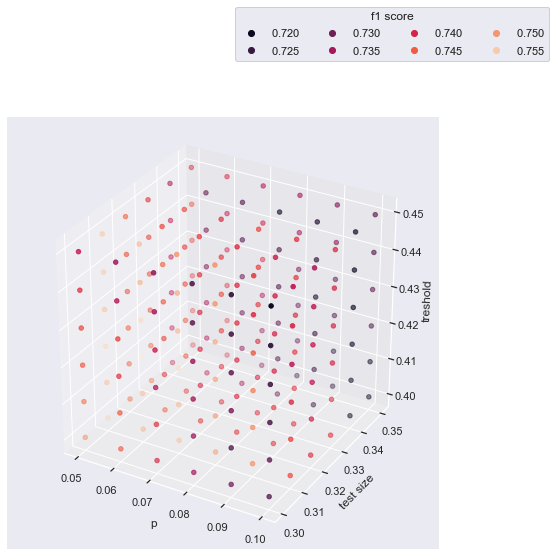

In [122]:

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1

# ax = fig.add_subplot(111, projection='3d') # Method 2
ps = []
test_sizes = []
tresholds = []
f1_scores = []
best = [0,0,0,0]
for p,test_size,treshold,f1_score in data:
    ps.append(p)
    test_sizes.append(test_size)
    tresholds.append(treshold)
    f1_scores.append(f1_score)
    if f1_score > best[3]:
        best = [p,test_size,treshold,f1_score]

p,test_size,treshold,f1_score = best
print(f'Best f1={f1_score} for p={round(p,2)}, test size={round(test_size,2)}, treshold={round(treshold,2)}')

g = ax.scatter(ps, test_sizes, tresholds, c=f1_scores)
legend = ax.legend(*g.legend_elements(), loc="upper right", title="f1 score", borderaxespad=-10, ncol=4)
ax.add_artist(legend)
ax.set_xlabel('p')
ax.set_ylabel('test size')
ax.set_zlabel('treshold')
plt.show()

## Comparing prediction from sklearn model

In [121]:

n_splits = 10
sss = StratifiedShuffleSplit(n_splits=n_splits,
                             test_size=test_size, 
                             random_state=42)

X = titanic.drop(['survived'],axis=1)
y = titanic['survived']
f1_scores = []

for train_index, test_index in sss.split(X, y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]

    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    
    lr_model = LogisticRegression(solver='liblinear',random_state=42)
    lr_model.fit(X_train,y_train)
    y_pred = lr_model.predict(X_test)
    f1 = f1s(y_test, y_pred, average='macro')
    f1_scores.append(f1)

f1_score = round(sum(f1_scores)/len(f1_scores),4)
print(f'f1={f1_score} for p={round(p,2)}, test size={round(test_size,2)}, treshold={round(treshold,2)}')

f1=0.8096 for p=0.06, test size=0.31, treshold=0.42
